In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import pickle
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import scipy.constants as C
# from torch import 

In [70]:
from sklearn.datasets import load_boston
import xgboost as xgb
reg = xgb.XGBRegressor()

In [80]:
reg.fit(boston.data, boston.target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

(array([ 21.,  56.,  83., 154.,  86.,  39.,  29.,   7.,  10.,  21.]),
 array([ 5.0006967,  9.502243 , 14.00379  , 18.505337 , 23.006884 ,
        27.50843  , 32.009975 , 36.511524 , 41.01307  , 45.514618 ,
        50.016163 ], dtype=float32),
 <BarContainer object of 10 artists>)

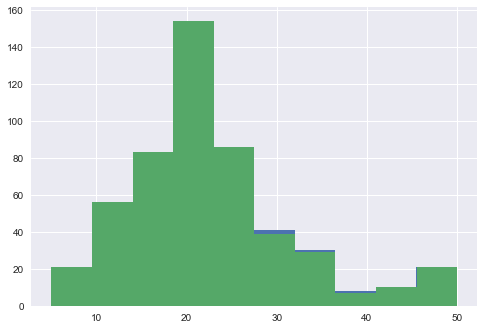

In [82]:
plt.hist(boston.target)
plt.hist(reg.predict(boston.data))

In [63]:
boston = load_boston()

In [89]:
reg.score(torch.from_numpy(boston.data),torch.from_numpy(boston.target))

TypeError: Not supported type for data.<class 'torch.Tensor'>

## qm9_complete_inhomo

In [2]:
data_path = '../data/qm9_complete_inhomo'
# data_train = np.load(os.path.join(data_path, 'train.npy'), allow_pickle=True)
data_test = np.load(os.path.join(data_path, 'test.npy'), allow_pickle=True)
data_valid = np.load(os.path.join(data_path, 'valid.npy'), allow_pickle=True)


In [8]:
print(type(data_test))
print(data_test.shape)
print(type(data_test[0]))
print(data_test.dtype)
print(data_test[0])

<class 'numpy.ndarray'>
(10000,)
<class 'dict'>
object
{'incident': tensor([[1., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 1.],
        [0., 0., 0.,  ..., 0., 1., 1.]]), 'incident_features': tensor([[ 0.0071,  1.3252,  0.1606,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0174, -0.0302,  0.0296,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0071,  1.3252,  0.1606,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 2.2396, -0.4408,  0.1976,  ...,  0.0000,  0.0000,  0.0000],
        [-0.5041, -1.9907, -2.2534,  ...,  0.0000,  0.0000,  0.0000],
        [ 2.2396, -0.4408,  0.1976,  ...,  0.0000,  0.0000,  0.0000]]), 'edge_neigh': tensor([ 1.,  0.,  2.,  0.,  3.,  0.,  4.,  0.,  5.,  0.,  6.,  0.,  7.,  0.,
         8.,  0.,  9.,  0., 10.,  0., 11.,  0., 12.,  0., 13.,  0., 14.,  0.,
         2.,  1.,  3.,  1.,  4.,  1.,  5.,  1.,  6.

In [4]:
feat_dict = data_test[0]
print(feat_dict.keys())
list(feat_dict.values())

dict_keys(['incident', 'incident_features', 'edge_neigh', 'labels'])


[tensor([[1., 1., 0.,  ..., 0., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 1., 0.],
         [0., 0., 0.,  ..., 1., 0., 1.],
         [0., 0., 0.,  ..., 0., 1., 1.]]),
 tensor([[ 0.0071,  1.3252,  0.1606,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0174, -0.0302,  0.0296,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0071,  1.3252,  0.1606,  ...,  0.0000,  0.0000,  0.0000],
         ...,
         [ 2.2396, -0.4408,  0.1976,  ...,  0.0000,  0.0000,  0.0000],
         [-0.5041, -1.9907, -2.2534,  ...,  0.0000,  0.0000,  0.0000],
         [ 2.2396, -0.4408,  0.1976,  ...,  0.0000,  0.0000,  0.0000]]),
 tensor([ 1.,  0.,  2.,  0.,  3.,  0.,  4.,  0.,  5.,  0.,  6.,  0.,  7.,  0.,
          8.,  0.,  9.,  0., 10.,  0., 11.,  0., 12.,  0., 13.,  0., 14.,  0.,
          2.,  1.,  3.,  1.,  4.,  1.,  5.,  1.,  6.,  1.,  7.,  1.,  8.,  1.,
          9.,  1., 10.,  1., 11.,  1., 12.,  1., 13.,  1., 

In [6]:
print(data_test.shape)

(10000,)


## USTC QM9 Dataset

In [9]:
dicpath = '../data/qm9-ustc'
cm = pd.read_table(os.path.join(dicpath, 'cm.tsv'), header=None, index_col=0)
ecfp4 = pd.read_table(os.path.join(dicpath, 'ecfp4.tsv'), header=None, index_col=0)
baml = pd.read_table(os.path.join(dicpath, 'baml.tsv'), header=None, index_col=0)
bob = pd.read_table(os.path.join(dicpath, 'bob.tsv'), header=None, index_col=0)

In [3]:
qm9nano = np.load(os.path.join(dicpath, 'qm9_nano.npz'), allow_pickle=True)

In [6]:
qm9nano = dict(qm9nano)

In [8]:
print(qm9nano['ID'])
print()
print(qm9nano['U0'], len(qm9nano['U0']))
print()
print(qm9nano['Atoms']) # 各个原子的原子序数
print()
print(qm9nano['Distance'])

NameError: name 'qm9nano' is not defined

In [29]:
bob = bob.sort_index()
bob.head()

,1,2,3,4,5,6,7,8,9,10,...,2200,2201,2202,2203,2204,2205,2206,2207,2208,2209
0,,,,,,,,,,,,,,,,,,,,,
qm9:000001,36.858105,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qm9:000002,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qm9:000003,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qm9:000004,36.858105,36.858105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qm9:000005,36.858105,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
baml.head()

,1,2,3,4,5,6,7,8,9,10,...,6384,6385,6386,6387,6388,6389,6390,6391,6392,6393
0,,,,,,,,,,,,,,,,,,,,,
qm9:000001,96770.9626,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1312.7501,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
qm9:000002,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1312.7501,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
qm9:000003,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1312.7501,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
qm9:000004,96770.9626,96770.9626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1312.7501,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0
qm9:000005,96770.9626,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1312.7501,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0


In [28]:
cm = cm.sort_index()
cm.head()

,1,2,3,4,5,6,7,8,9,10,...,891,892,893,894,895,896,897,898,899,900
0,,,,,,,,,,,,,,,,,,,,,
qm9:000001,36.858105,5.494775,5.494769,5.494749,5.494742,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qm9:000002,53.358707,6.881723,6.881703,6.881582,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qm9:000003,73.516695,8.315085,8.315085,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qm9:000004,36.858105,30.023043,2.653484,5.649190,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qm9:000005,53.358707,36.466313,3.155504,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
ecfp4.head()

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,,,,,,,,,,,,,,,,,,,,,
qm9:000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
qm9:000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
qm9:000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
qm9:000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
qm9:000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            891, 892, 893, 894, 895, 896, 897, 898, 899, 900],
           dtype='int64', length=900)

In [14]:
ecfp4.describe()

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
count,130462.000000,130462.000000,130462.000000,130462.000000,130462.000000,130462.000000,130462.000000,130462.000000,130462.000000,130462.000000,...,130462.00000,130462.000000,130462.000000,130462.000000,130462.000000,130462.000000,130462.000000,130462.000000,130462.000000,130462.000000
mean,0.006393,0.003825,0.014502,0.018120,0.016480,0.024045,0.010716,0.006454,0.007029,0.004745,...,0.03434,0.005266,0.003787,0.004047,0.005197,0.014533,0.013031,0.045454,0.018695,0.011613
std,0.079698,0.061727,0.119550,0.133387,0.127312,0.153190,0.102961,0.080077,0.083543,0.068718,...,0.18210,0.072375,0.061419,0.063489,0.071902,0.119674,0.113406,0.208298,0.135446,0.107135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## QM9 Source Dataset

<img src="atom.png" style="zoom:67%;">

<img src="comment.png" style="zoom:67%;">

In [6]:
os.listdir(os.getcwd())

['asd.txt',
 'atom.png',
 'comment.png',
 'cv.pdf',
 'dataview.ipynb',
 'data_process.py',
 'main.ipynb',
 'main_window.py',
 'molecule.py',
 'molecule.ui',
 'process.py',
 'qm9.db',
 '__pycache__']

In [2]:
data_path = '../data/dsgdb9nsd.xyz/'
fnames = os.listdir(data_path)
fnames = [os.path.join(data_path, fname) for fname in fnames]
print('numebr:', len(fnames))
fnames[:5]

numebr: 133885


['../data/dsgdb9nsd.xyz/dsgdb9nsd_000001.xyz',
 '../data/dsgdb9nsd.xyz/dsgdb9nsd_000002.xyz',
 '../data/dsgdb9nsd.xyz/dsgdb9nsd_000003.xyz',
 '../data/dsgdb9nsd.xyz/dsgdb9nsd_000004.xyz',
 '../data/dsgdb9nsd.xyz/dsgdb9nsd_000005.xyz']

In [81]:
Smile = []
InChI = []
for fname in fnames:
    with open(fname, 'r') as f:
        ls = f.readlines()
        Smile.append(ls[-2])
        InChI.append(ls[-1])

In [85]:
Smile_sp = list(map(str.split, Smile))
InChI_sp = list(map(str.split, InChI))

In [92]:
# lens = list(map(len, Smile_sp))
lens = list(map(len, InChI_sp))


In [79]:
lines[-1].split()

['InChI=1S/C4H8O/c1-3-2-4(3)5/h3-5H,2H2,1H3',
 'InChI=1S/C4H8O/c1-3-2-4(3)5/h3-5H,2H2,1H3/t3-,4+/m0/s1']

In [46]:
with open(fnames[100], 'r') as f:
    txt = f.read()
with open(fnames[100], 'r') as f:
    lines = f.readlines()

In [60]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

In [48]:
print(lines[-2])
print(lines[0])

CC1CC1O	C[C@H]1C[C@H]1O	

13



### Smiles 单行文本表示
- 同位素表示为[13C]。
- 绝对定位由“ @”和“ @@”指示。(手性)
- 双键几何异构由“ /”和“ \”表示。

In [125]:
mol1 = Chem.AddHs(Chem.MolFromSmiles(lines[-2].split()[0]))
print(Chem.MolToSmiles(mol1))
mol2 = Chem.AddHs(Chem.MolFromSmiles(lines[-2].split()[1]))
print(Chem.MolToSmiles(mol2))

[H]OC1([H])C([H])([H])C1([H])C([H])([H])[H]
[H]O[C@]1([H])C([H])([H])[C@]1([H])C([H])([H])[H]


[H]OC1([H])C([H])([H])C1([H])C([H])([H])[H] InChI=1S/C4H8O/c1-3-2-4(3)5/h3-5H,2H2,1H3


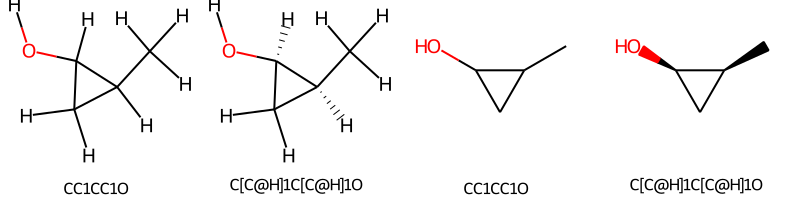

In [130]:
mol01 = Chem.AddHs(Chem.MolFromInchi(InChI_sp[100][0]))
mol02 = Chem.AddHs(Chem.MolFromInchi(InChI_sp[100][1]))
print(Chem.MolToSmiles(mol01), Chem.MolToInchi(mol01))
Draw.MolsToGridImage([mol01,mol02,Chem.RemoveHs(mol01),Chem.RemoveHs(mol02)],molsPerRow=4,legends=[smi1,smi2,smi1,smi2])

In [117]:
smi1 = Chem.MolToSmiles(Chem.RemoveHs(mol1))
smi2 = Chem.MolToSmiles(Chem.RemoveHs(mol2))
mol = Chem.MolFromSmiles(Smile[0])
smi = Chem.MolToSmiles(mol)

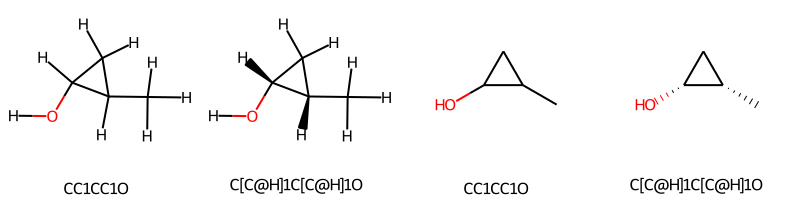

In [121]:
Draw.MolsToGridImage([mol1,mol2,Chem.RemoveHs(mol1),Chem.RemoveHs(mol2)],molsPerRow=4,legends=[smi1,smi2,smi1,smi2])

In [124]:
max(lens)

2

In [108]:
mol01 = Chem.MolFromInchi(lines[-1])

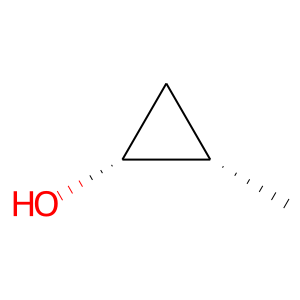

In [116]:
Draw.MolToImage(Chem.RemoveHs())

In [63]:
type(asd)

PIL.PngImagePlugin.PngImageFile

In [49]:
mol = Chem.MolFromSmiles(lines[-2])

In [50]:
smi = Chem.MolToSmiles(mol)

'CC1CC1O'

In [51]:
mol.GetAtoms()

In [52]:
mol.GetAtomWithIdx(0)

In [53]:
print(smi)
print(Chem.MolToSmiles(Chem.AddHs(mol)))

CC1CC1O
[H]OC1([H])C([H])([H])C1([H])C([H])([H])[H]


[]

In [3]:
print(txt)

7
gdb 11	57.22434	10.11122	9.07368	2.5682	25.11	-0.254	-0.0198	0.2342	166.9728	0.055355	-153.787612	-153.783728	-153.782784	-153.812518	11.219	
C	-0.0029448212	 1.5099136648	 0.0086727849	-0.450261
C	 0.0260828384	 0.0032756259	-0.037459115	 0.172035
O	 0.9422880119	-0.6550703513	-0.4568257611	-0.225955
H	 0.9227880213	 1.926342418	-0.3914655687	 0.14545
H	-0.8620154031	 1.878524808	-0.5647953841	 0.143233
H	-0.1505063787	 1.8439338318	 1.0428910048	 0.143262
H	-0.8944300885	-0.4864340773	 0.3577486492	 0.072236
168.181	501.1212	773.3101	884.1529	1124.8371	1138.5323	1373.2848	1431.5273	1459.9055	1471.282	1841.2906	2861.5286	3029.6122	3089.0262	3150.4048
CC=O	CC=O	
InChI=1S/C2H4O/c1-2-3/h2H,1H3	InChI=1S/C2H4O/c1-2-3/h2H,1H3



In [6]:
# 原始文本第二行为"scalar"类型的属性，共17个，后15个有意义
A = "rotational_constant_A"
B = "rotational_constant_B"
C = "rotational_constant_C"
mu = "dipole_moment"
alpha = "isotropic_polarizability"
homo = "homo" # 最高占据分子轨道
lumo = "lumo" # 最低未占据分子轨道（lumo > homo）
gap = "gap"
r2 = "electronic_spatial_extent"
zpve = "zpve" # 零点振动能
U0 = "energy_U0" # OK 内能
U = "energy_U" # RT 内能
H = "enthalpy_H" # RT 焓
G = "free_energy" # RT 吉布斯函数
Cv = "heat_capacity" # RT 热容

reference = {zpve: 0, U0: 1, U: 2, H: 3, G: 4, Cv: 5}
prop_names = [A, B, C, mu, alpha, homo, lumo, gap, r2, zpve, U0, U, H, G, Cv] # comment 行的15个可用属性
units = [ 1.0, 1.0, 1.0, Debye, Bohr ** 3, Hartree, Hartree, Hartree, Bohr ** 2, Hartree, Hartree, Hartree, Hartree, Hartree, 1.0]

num_mol = len(fnames)
properties = [None] * num_mol
# coordinates = [None] * num_mol 
atoms = [None] * num_mol # 各个原子：坐标 & 电荷量
vibrations = [None] * num_mol # 振动本征频率
for i in range(num_mol):
    # fnames 自然是排序号的文件名称
    with open(fnames[i],'r') as f:
        lines = f.readlines()
        prop_values = lines[1].split()[2:]
        properties[i] = {prop_names[i]: float(prop_values[i])*units[i] for i in range(15)} # 分子属性值
        vibrations[i] = 


SyntaxError: invalid syntax (<ipython-input-6-6f9666aacbba>, line 31)

In [9]:
properties = list(range(len(fnames)))


In [11]:
# as 

In [170]:
from ase.io.extxyz import read_xyz, write_xyz
from ase.units import Debye, Bohr, Hartree, eV
import re
import shutil
import pandas as pd
import tempfile
from ase.visualize import view

In [13]:
units = [ 1.0, 1.0, 1.0, Debye, Bohr ** 3, Hartree, Hartree, Hartree, Bohr ** 2, Hartree, Hartree, Hartree, Hartree, Hartree, 1.0]

1 Hartree = 2625.5 kJ mol⁻¹

1 Bhor = 5.29×10−11 m


In [137]:
prop_names = ['A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'U0', 'U','H','G','Cv']
df_prop = pd.DataFrame(columns=prop_names)

In [ ]:
df_prop.po

In [175]:
# 原始文本第二行为"scalar"类型的属性，共17个，后15个有意义
# 能量参数的单位都是 Hatree
A = "rotational_constant_A" # 转动频率：GHz
B = "rotational_constant_B"
C = "rotational_constant_C"
mu = "dipole_moment"
alpha = "isotropic_polarizability" # 各向同性极化率
lumo = "lumo" # 最低未占据分子轨道（lumo > homo）
gap = "gap" # lumo - homo
r2 = "electronic_spatial_extent" # 电子空间距离度量: a0^2
zpve = "zpve" # 零点振动能
U0 = "energy_U0" # OK 内能
U = "energy_U" # RT 内能
H = "enthalpy_H" # RT 焓
G = "free_energy" # RT 吉布斯函数
Cv = "heat_capacity" # RT 热容

reference = {zpve: 0, U0: 1, U: 2, H: 3, G: 4, Cv: 5}
prop_names = ['A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'U0', 'U','H','G','Cv']

# prop_names = [A, B, C, mu, alpha, homo, lumo, gap, r2, zpve, U0, U, H, G, Cv]
units = [ 1.0, 1.0, 1.0, Debye, Bohr ** 3, Hartree, Hartree, Hartree, Bohr ** 2, Hartree, Hartree, Hartree, Hartree, Hartree, 1.0]


# raw_path = '../data/dsgdb9nsd.xyz'
# ordered_files = sorted(os.listdir(raw_path), key=lambda x: (int(re.sub("\D", "", x)), x))
# all_atoms = []
# all_properties = []
# irange = np.arange(len(ordered_files), dtype=np.int) # 0 -- 133885
Smiles = []
InChI = []
atom_nums = []
# properties = {pn: [] for p in prop_names}# 属性都存在字典数据中
properties = [] # 暂时用列表（数组）存储属性值
df_prop = pd.DataFrame(columns=prop_names)
# coordinates = [] # element size： [n, 3] ndarray
# Z_numbers = [] # 原子序数和空间坐标由 atom object 中的 numbers 和 positions 属性获得
charges = [] # element length： n
harmonics = [] # 自由度：3n-6
all_atoms = []
data_path = '../data/dsgdb9nsd.xyz/'
fnames = os.listdir(data_path)
fnames = [os.path.join(data_path, fname) for fname in fnames]
print('file numebr:', len(fnames))

tmpdir = tempfile.mkdtemp("gdb9") # 临时目录为利用 read_xyz 读取xyz文件

# parsing
for i, fname in enumerate(fnames):
    ##################
    if i > 100:
        break
    ##################
    if (i + 1) % 10000 == 0:
        # logging.info("Parsed: {:6d} / 133885".format(i + 1))
        print("Parsed: {:6d} / 133885".format(i + 1))
    tmp = os.path.join(tmpdir, "tmp.xyz")

    with open(fname, "r") as f:
        lines = f.readlines()
        atom_nums.append(int(lines[0])) # atom number in every molecule
        harmonics.append(list(map(float, lines[-3].split())))
        Smiles.append(lines[-2].split())
        InChI.append(lines[-1].split())
        # l = lines[1].split()[2:] 
        properties.append(list(map(float, lines[1].split()[2:])))# 后15个属性值
        # 坐标&电荷数据
        coord = np.array([])
        charge = []
        for i in range(2, 2+int(lines[0])):
            charge.append(float(lines[i].split()[-1]))
            # coord = np.append(coord, list(map(float, l[1:-1])))
        charges.append(charge)
        # corrdinates.append(coord)
        with open(tmp, "wt") as fout:
            for line in lines:
                fout.write(line.replace("*^", "e"))
    with open(tmp, "r") as f:
        ats = list(read_xyz(f, 0))[0] # atoms object (ASE)
    all_atoms.append(ats)

shutil.rmtree(tmpdir)


file numebr: 133885


### view 可选格式
- if vwr == 'vmd':
- elif vwr == 'rasmol':
- elif vwr == 'xmakemol':
- elif vwr == 'gopenmol':
- elif vwr == 'avogadro':
- elif vwr == 'sage':
- elif vwr in ('ngl', 'nglview'):
- elif vwr == 'x3d':
- elif vwr == 'paraview':

In [214]:
view(all_atoms[-1], viewer='x3d',repeat=10)

In [226]:
view(ats)

In [177]:
type(asd)

IPython.core.display.HTML

In [183]:
all_atoms[0].numbers # 原子序数

array([6, 1, 1, 1, 1])

In [192]:
all_atoms[0].numbers

array([6, 1, 1, 1, 1])

In [194]:
all_atoms[0].positions

array([[-1.26981359e-02,  1.08580416e+00,  8.00099580e-03],
       [ 2.15041600e-03, -6.03131760e-03,  1.97612040e-03],
       [ 1.01173084e+00,  1.46375116e+00,  2.76574800e-04],
       [-5.40815069e-01,  1.44752661e+00, -8.76643715e-01],
       [-5.23813634e-01,  1.43793264e+00,  9.06397294e-01]])

In [196]:
all_atoms[100].cell

Cell([0.0, 0.0, 0.0])

In [199]:
all_atoms[100].number_of_lattice_vectors

0

In [213]:
from ase.io.png import write_png
write_png('ats.png',ats)

In [210]:
?write_png

Signature: write_png(filename, atoms, **parameters)
Docstring: <no docstring>
File:      c:\users\admin\miniconda3\lib\site-packages\ase\io\png.py
Type:      function


In [176]:
write_xyz('atoms0.xyz',all_atoms[100])

In [2]:
from schnetpack import AtomsData
from schnetpack.datasets import QM9

In [4]:
qm9data = QM9(dbpath='./qm9.db', download=False)

In [6]:
print('type:',type(qm9data))
print('number of moleculars:', len(qm9data))
print('properties:')
qm9data.available_properties

type: <class 'schnetpack.datasets.qm9.QM9'>
number of moleculars: 133885
properties:


['rotational_constant_A',
 'rotational_constant_B',
 'rotational_constant_C',
 'dipole_moment',
 'isotropic_polarizability',
 'homo',
 'lumo',
 'gap',
 'electronic_spatial_extent',
 'zpve',
 'energy_U0',
 'energy_U',
 'enthalpy_H',
 'free_energy',
 'heat_capacity']

In [15]:
qm9data[0]

{'rotational_constant_A': tensor([157.7118]),
 'rotational_constant_B': tensor([157.7100]),
 'rotational_constant_C': tensor([157.7070]),
 'dipole_moment': tensor([0.]),
 'isotropic_polarizability': tensor([1.9575]),
 'homo': tensor([-10.5499]),
 'lumo': tensor([3.1865]),
 'gap': tensor([13.7363]),
 'electronic_spatial_extent': tensor([9.9030]),
 'zpve': tensor([1.2177]),
 'energy_U0': tensor([-1101.4878]),
 'energy_U': tensor([-1101.4098]),
 'enthalpy_H': tensor([-1101.3840]),
 'free_energy': tensor([-1102.0229]),
 'heat_capacity': tensor([6.4690]),
 '_atomic_numbers': tensor([6, 1, 1, 1, 1]),
 '_positions': tensor([[-2.8340e-06,  2.3050e-06, -1.4378e-07],
         [ 1.4846e-02, -1.0918e+00, -6.0250e-03],
         [ 1.0244e+00,  3.7795e-01, -7.7246e-03],
         [-5.2812e-01,  3.6172e-01, -8.8464e-01],
         [-5.1112e-01,  3.5213e-01,  8.9840e-01]]),
 '_cell': tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 '_neighbors': tensor([[1, 2, 3, 4],
         [0, 2,

In [18]:
at = qm9data.get_atoms(idx=0)
print('Atoms object:', at)

at2, props = qm9data.get_properties(idx=0)
print('Atoms object (not the same):', at2)
print('Equivalent:', at2 == at, '; not the same object:', at2 is at)

Atoms object: Atoms(symbols='CH4', pbc=False)
Atoms object (not the same): Atoms(symbols='CH4', pbc=False)
Equivalent: True ; not the same object: False


In [19]:
qm9data.get_properties(idx=0)

(Atoms(symbols='CH4', pbc=False),
 {'rotational_constant_A': tensor([157.7118]),
  'rotational_constant_B': tensor([157.7100]),
  'rotational_constant_C': tensor([157.7070]),
  'dipole_moment': tensor([0.]),
  'isotropic_polarizability': tensor([1.9575]),
  'homo': tensor([-10.5499]),
  'lumo': tensor([3.1865]),
  'gap': tensor([13.7363]),
  'electronic_spatial_extent': tensor([9.9030]),
  'zpve': tensor([1.2177]),
  'energy_U0': tensor([-1101.4878]),
  'energy_U': tensor([-1101.4098]),
  'enthalpy_H': tensor([-1101.3840]),
  'free_energy': tensor([-1102.0229]),
  'heat_capacity': tensor([6.4690]),
  '_atomic_numbers': tensor([6, 1, 1, 1, 1]),
  '_positions': tensor([[-2.8340e-06,  2.3050e-06, -1.4378e-07],
          [ 1.4846e-02, -1.0918e+00, -6.0250e-03],
          [ 1.0244e+00,  3.7795e-01, -7.7246e-03],
          [-5.2812e-01,  3.6172e-01, -8.8464e-01],
          [-5.1112e-01,  3.5213e-01,  8.9840e-01]]),
  '_cell': tensor([[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0

In [7]:
import ase
from schnetpack.datasets import DownloadableAtomsData, QM9

In [12]:
qm9data = QM9(dbpath='./qm9.db',download=False,load_only=[QM9.U0, QM9.G, QM9.gap],remove_uncharacterized=True)

In [13]:
qm9data[0]

C:\Users\Admin\miniconda3\lib\site-packages\ase\atoms.py:971: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_number_of_atoms() instead',


{'energy_U0': tensor([-1101.4878]),
 'free_energy': tensor([-1102.0229]),
 'gap': tensor([13.7363]),
 '_atomic_numbers': tensor([6, 1, 1, 1, 1]),
 '_positions': tensor([[-2.8340e-06,  2.3050e-06, -1.4378e-07],
         [ 1.4846e-02, -1.0918e+00, -6.0250e-03],
         [ 1.0244e+00,  3.7795e-01, -7.7246e-03],
         [-5.2812e-01,  3.6172e-01, -8.8464e-01],
         [-5.1112e-01,  3.5213e-01,  8.9840e-01]]),
 '_cell': tensor([[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]),
 '_neighbors': tensor([[1, 2, 3, 4],
         [0, 2, 3, 4],
         [0, 1, 3, 4],
         [0, 1, 2, 4],
         [0, 1, 2, 3]]),
 '_cell_offset': tensor([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0

In [3]:
import schnetpack as spk

In [14]:
train_data, valid_data, test_data = spk.train_test_split(data=qm9data,num_train=2000,num_val=2000,split_file=os.path.join('../output', 'split.npz'))
train_loader = spk.AtomsLoader(train_data, batch_size=100, shuffle=True)
valid_loader = spk.AtomsLoader(valid_data, batch_size=100)

In [15]:
atomrefs = qm9data.get_atomref([QM9.U0, QM9.G]) # 原子：0K能量、自由能、能带
print('U0 of hyrogen:', '{:.2f}'.format(atomrefs[QM9.U0][1][0]), 'eV')
print('U0 of carbon:', '{:.2f}'.format(atomrefs[QM9.U0][6][0]), 'eV')
print('U0 of oxygen:', '{:.2f}'.format(atomrefs[QM9.U0][8][0]), 'eV')
print()
print('G of hyrogen:', '{:.2f}'.format(atomrefs[QM9.G][1][0]), 'eV')
print('G of carbon:', '{:.2f}'.format(atomrefs[QM9.G][6][0]), 'eV')
print('G of oxygen:', '{:.2f}'.format(atomrefs[QM9.G][8][0]), 'eV')

U0 of hyrogen: -13.61 eV
U0 of carbon: -1029.86 eV
U0 of oxygen: -2042.61 eV

G of hyrogen: -13.90 eV
G of carbon: -1030.26 eV
G of oxygen: -2043.02 eV


In [21]:
len(train_data)

2000

In [24]:
means, stddevs = train_loader.get_statistics(
    QM9.U0, divide_by_atoms=True, single_atom_ref=atomrefs,
)
print('Mean atomization energy / atom:', means[QM9.U0])
print('Std. dev. atomization energy / atom:', stddevs[QM9.U0])

C:\Users\Admin\miniconda3\lib\site-packages\ase\atoms.py:971: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_number_of_atoms() instead',
Mean atomization energy / atom: tensor([-4.2479])
Std. dev. atomization energy / atom: tensor([0.1915])


In [107]:
# The next step is to build the neural network model. This consists of 2 parts:

# The representation part which either constructs atom-wise features, e.g. with SchNet, or build a fixed descriptor such as atom-centered symmetry functions.
# One or more output modules for property prediction.

In [27]:
import schnetpack.train as trn
from torch import optim

schnet = spk.representation.SchNet(
    n_atom_basis=30, n_filters=30, n_gaussians=20, n_interactions=5,
    cutoff=4., cutoff_network=spk.nn.cutoff.CosineCutoff
)

output_U0 = spk.atomistic.Atomwise(n_in=30, atomref=atomrefs[QM9.U0],property=QM9.U0,mean=means[QM9.U0], stddev=stddevs[QM9.U0])
model = spk.AtomisticModel(representation=schnet, output_modules=output_U0)

# loss function
def mse_loss(batch, result):
    diff = batch[QM9.U0]-result[QM9.U0]
    err_sq = torch.mean(diff ** 2)
    return err_sq
# optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

loss = trn.build_mse_loss([QM9.U0])

metrics = [spk.metrics.MeanAbsoluteError(QM9.U0)]
hooks = [
    trn.CSVHook(log_path='../output', metrics=metrics),
    trn.ReduceLROnPlateauHook(
        optimizer,
        patience=5, factor=0.8, min_lr=1e-6,
        stop_after_min=True
    )
]

trainer = trn.Trainer(
    model_path='../output',
    model=model,
    hooks=hooks,
    loss_fn=loss,
    optimizer=optimizer,
    train_loader=train_loader,
    validation_loader=valid_loader,
)


In [28]:
trainer.train(n_epochs=6,device='cpu')

ValueError: could not convert string to float: ''

Final validation MAE: 0.43 eV = 9.9 kcal/mol


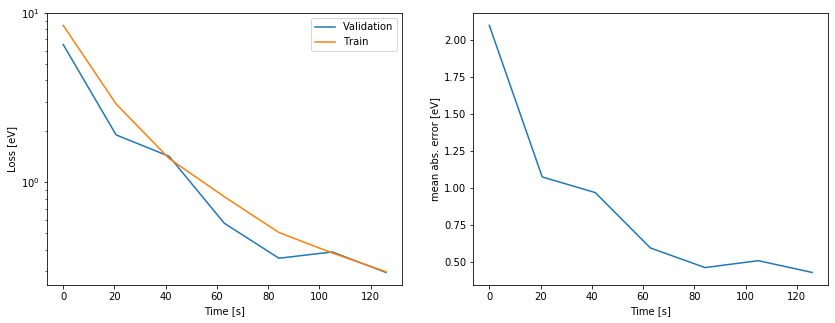

In [111]:
from ase.units import *
results = np.loadtxt(os.path.join('../output', 'log.csv'), skiprows=1, delimiter=',')

time = results[:,0]-results[0,0]
learning_rate = results[:,1]
train_loss = results[:,2]
val_loss = results[:,3]
val_mae = results[:,4]

print('Final validation MAE:', np.round(val_mae[-1], 2), 'eV =',
      np.round(val_mae[-1] / (kcal/mol), 2), 'kcal/mol')

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(time, val_loss, label='Validation')
plt.plot(time, train_loss, label='Train')
plt.yscale('log')
plt.ylabel('Loss [eV]')
plt.xlabel('Time [s]')
plt.legend()
plt.subplot(1,2,2)
plt.plot(time, val_mae)
plt.ylabel('mean abs. error [eV]')
plt.xlabel('Time [s]')
plt.show()


In [ ]:
# use model

In [113]:
best_model = torch.load(os.path.join('../output', 'best_model'))


test_loader = spk.AtomsLoader(test_data, batch_size=2000)

err = 0
print(len(test_loader))
for count, batch in enumerate(test_loader):
    # move batch to GPU, if necessary
    batch = {k: v.to(device) for k, v in batch.items()}

    # apply model
    pred = best_model(batch)

    # calculate absolute error
    tmp = torch.sum(torch.abs(pred[QM9.U0]-batch[QM9.U0]))
    tmp = tmp.detach().cpu().numpy() # detach from graph & convert to numpy
    err += tmp

    # log progress
    percent = '{:3.2f}'.format(count/len(test_loader)*100)
    print('Progress:', percent+'%'+' '*(5-len(percent)), end="\r")

err /= len(test)
print('Test MAE', np.round(err, 2), 'eV =',
      np.round(err / (kcal/mol), 2), 'kcal/mol')

65


NameError: name 'device' is not defined